In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/DiplomadoEPM_2019/master/Modulo3/init.py
from init import init; init(force_download=False)

In [2]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

'2.1.0'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
from io import BytesIO
from six.moves import urllib
from tensorflow.keras.applications import inception_v3, InceptionV3
tf.__version__

'2.1.0'

## Inception V3 architecture to predict ImageNet classes

see 

- https://github.com/tensorflow/models/tree/master/research/inception
- https://medium.com/@utsumuki_neko/using-inception-v3-from-tensorflow-hub-for-transfer-learning-a931ff884526


In [4]:
model = InceptionV3(weights='imagenet', include_top=True)

In [5]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [6]:
k = model.get_layer("input_1")
k.input

<tf.Tensor 'input_1:0' shape=(None, 299, 299, 3) dtype=float32>

In [7]:
k = model.get_weights()

In [8]:
from skimage.transform import resize
img = plt.imread("local/imgs/french-horn.jpg")
img = resize(img, output_shape=(299,299,3))
img.shape, np.min(img),np.max(img)

((299, 299, 3), 0.0, 1.0)

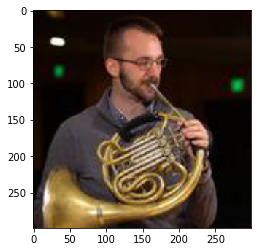

In [9]:
plt.imshow(img)

### predict and decode

In [10]:
pred = model.predict(img.reshape(-1,*img.shape))
pred.shape

(1, 1000)

In [12]:
pred[0]

array([7.63460685e-06, 4.91648825e-06, 1.26675777e-05, 1.22343454e-05,
       7.04165177e-06, 3.55283519e-05, 3.17184677e-05, 4.16358216e-06,
       1.33940157e-05, 2.50236262e-05, 1.57847244e-04, 7.27906900e-06,
       2.49814711e-05, 6.22658627e-06, 5.30392936e-06, 1.18363650e-05,
       5.49624338e-06, 4.58687327e-06, 3.30285252e-06, 6.99467319e-06,
       2.47714197e-05, 4.47668481e-06, 1.29049622e-05, 1.90753162e-05,
       6.78683182e-06, 7.31790760e-06, 2.11583938e-05, 3.36213743e-05,
       2.63710735e-05, 1.49834577e-05, 2.00497398e-05, 6.58939325e-06,
       1.43813759e-05, 1.97484042e-05, 1.64305475e-05, 1.81830728e-05,
       2.38721332e-05, 1.87327005e-05, 1.44170663e-05, 7.37417031e-06,
       4.70549421e-05, 5.62835121e-05, 1.30685175e-05, 2.04557928e-05,
       2.28085119e-05, 1.73017179e-05, 2.90079624e-05, 1.82264612e-05,
       1.67462731e-05, 7.77551759e-06, 1.50512860e-05, 1.44077467e-05,
       5.55161523e-06, 3.62957780e-06, 3.40630759e-05, 9.86843588e-06,
      

In [13]:
print ("highest probabilities", np.sort(pred[0])[::-1][:10])
print ("highest class codes  ", np.argsort(pred[0])[::-1][:10])

highest probabilities [9.8325193e-01 5.5237993e-04 5.1814719e-04 3.4888720e-04 1.8092185e-04
 1.7399102e-04 1.6423741e-04 1.5784724e-04 1.3789535e-04 1.3685760e-04]
highest class codes   [566 683 432 262 676 513 639  10  70  57]


In [14]:
from tensorflow.keras.applications.inception_v3 import decode_predictions

print ('Predicted:')
k = decode_predictions(pred, top=100)[0]
for i in k:
    print("%10s %20s %.6f"%i)


Predicted:
 n03394916          French_horn 0.983252
 n03838899                 oboe 0.000552
 n02804610              bassoon 0.000518
 n02112706    Brabancon_griffon 0.000349
 n03803284               muzzle 0.000181
 n03110669               cornet 0.000174
 n03710721              maillot 0.000164
 n01530575            brambling 0.000158
 n01770081           harvestman 0.000138
 n01735189         garter_snake 0.000137
 n01930112             nematode 0.000128
 n07831146            carbonara 0.000082
 n01770393             scorpion 0.000075
 n04086273             revolver 0.000067
 n04579432              whistle 0.000066
 n02669723        academic_gown 0.000061
 n04116512        rubber_eraser 0.000060
 n02106550           Rottweiler 0.000060
 n03777754                modem 0.000060
 n03944341             pinwheel 0.000060
 n04152593               screen 0.000058
 n03017168                chime 0.000057
 n01685808             whiptail 0.000056
 n02396427            wild_boar 0.000056
 n078

### occlusion affects prediction

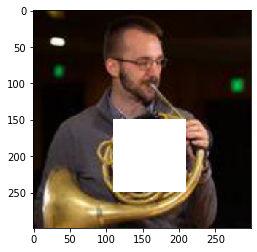

In [54]:
oimg = img.copy()
w,h=100,100
bx,by=110,150
oimg[by:by+h,bx:bx+w]=np.max(oimg)
p = oimg[by:by+h,bx:bx+w,:]
plt.imshow(oimg)

observe how prediction probabilities change when occlusion happens on the key object. Try also the following:

- bx=80 and by=80

what part of the instrument is more responsible for the CNN classification?

In [55]:
pred = model.predict(oimg.reshape(-1,*oimg.shape))
decode_predictions(pred, top=5)

[[('n02815834', 'beaker', 0.10617971),
  ('n03110669', 'cornet', 0.09212437),
  ('n03394916', 'French_horn', 0.07629236),
  ('n02804610', 'bassoon', 0.076237775),
  ('n04579145', 'whiskey_jug', 0.04271703)]]